In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date, time, datetime, timedelta

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Parte 1 - Organização DB

In [4]:
conn = ps.connect(dbname = 'postgres',
                  user = 'postgres',
                  password = 'tc3',
                  host = 'localhost',
                  port = '5432' 
                  )

In [5]:
sql = """
SELECT * FROM dbo.pnad_covid
"""

In [6]:
df = sqlio.read_sql_query(sql,conn)

In [7]:
df.head()

,uf,idade,sexo,cor_raca,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular,resultado_teste,fez_isolamento,procurou_unid_saude,recebeu_aux,faixa_rendimento
0,11,36,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,1,4.0
1,11,30,2,4,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,1,4.0
2,11,13,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,4,NaN,1,NaN
3,11,11,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,4,NaN,1,NaN
4,11,57,2,1,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN


In [8]:
df.isnull().sum()

uf                           0
idade                        0
sexo                         0
cor_raca                     0
sin_febre                    0
sin_tosse                    0
sin_dor_garganta             0
sin_dific_respirar           0
sin_dor_cabeca               0
si_dor_peito                 0
sin_nausea                   0
sin_nariz_entup              0
sin_fadiga                   0
sin_perda_olf                0
sin_dor_muscular             0
resultado_teste        1098266
fez_isolamento               0
procurou_unid_saude    1104247
recebeu_aux                  0
faixa_rendimento        726288
dtype: int64

In [9]:
uf_dict = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal"
}

uf_regiao_dict_id = {
    11: "Norte",
    12: "Norte",
    13: "Norte",
    14: "Norte",
    15: "Norte",
    16: "Norte",
    17: "Norte",
    21: "Nordeste",
    22: "Nordeste",
    23: "Nordeste",
    24: "Nordeste",
    25: "Nordeste",
    26: "Nordeste",
    27: "Nordeste",
    28: "Nordeste",
    29: "Nordeste",
    31: "Sudeste",
    32: "Sudeste",
    33: "Sudeste",
    35: "Sudeste",
    41: "Sul",
    42: "Sul",
    43: "Sul",
    50: "Centro-Oeste",
    51: "Centro-Oeste",
    52: "Centro-Oeste",
    53: "Centro-Oeste"
}


uf_regiao_dict_sigla = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RS': 'Sul',
    'RO': 'Norte',
    'RR': 'Norte',
    'SC': 'Sul',
    'SP': 'Sudeste',
    'SE': 'Nordeste',
    'TO': 'Norte'
}

In [10]:
sexo_dict = {
    1: "Homem",
    2: "Mulher"
}


cor_raca_dict = {
    1: "Branca",
    2: "Preta",
    3: "Amarela",
    4: "Parda",
    5: "Indígena",
    9: "Ignorado"
}

In [11]:
sintomas_dict = {
    1: "Sim",
    2: "Não",
    3: "Não sabe",
    9: "Ignorado"
}

In [12]:
teste_coronavirus_dict = {
    1: "Positivo",
    2: "Negativo",
    3: "Inconclusivo",
    4: "Ainda não recebeu o resultado",
    9: "Ignorado",
		None: None
}

In [13]:
fez_isolamento_dict = {
    1: "Não fez restrição, levou vida normal como antes da pandemia",
    2: "Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas",
    3: "Ficou em casa e só saiu em caso de necessidade básica",
    4: "Ficou rigorosamente em casa",
    9: "Ignorado"
}

fez_isolamento_dict_v2 = {
    1: "Não",
    2: "Moderado",
    3: "Sim",
    4: "Totalmente",
    9: "Ignorado"
}

In [14]:
procurou_unid_saude_dict = {
    1: "Sim",
    2: "Não",
    9: "Ignorado",
    None: None
}

In [15]:
recebeu_aux_dict = {
    1: "Sim",
    2: "Não"
}

In [16]:
faixa_rendimento_dict = {
    0: '0 - 100',
    1: '101 - 300',
    2: '301 - 600',
    3: '601 - 800',
    4: '801 - 1.600',
    5: '1.601 - 3.000',
    6: '3.001 - 10.000',
    7: '10.001 - 50.000',
    8: '50.001 - 100.000',
    9: '+100.000',
    "NAN": None
}

In [17]:
df_trabalho = df.copy()

In [18]:
df_trabalho.head()

,uf,idade,sexo,cor_raca,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular,resultado_teste,fez_isolamento,procurou_unid_saude,recebeu_aux,faixa_rendimento
0,11,36,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,1,4.0
1,11,30,2,4,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,1,4.0
2,11,13,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,4,NaN,1,NaN
3,11,11,1,4,2,2,2,2,2,2,2,2,2,2,2,NaN,4,NaN,1,NaN
4,11,57,2,1,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN


In [19]:
colunas_sintomas = df_trabalho.iloc[:, 4:-5]
lista_colunas_sintomas = colunas_sintomas.columns.to_list() # criação de uma lista contendo nomes de columas de sintomas
print(lista_colunas_sintomas)

['sin_febre', 'sin_tosse', 'sin_dor_garganta', 'sin_dific_respirar', 'sin_dor_cabeca', 'si_dor_peito', 'sin_nausea', 'sin_nariz_entup', 'sin_fadiga', 'sin_perda_olf', 'sin_dor_muscular']


In [20]:
df_trabalho.uf = df_trabalho.uf.map(uf_dict)
df_trabalho.sexo = df_trabalho.sexo.map(sexo_dict)
df_trabalho.cor_raca = df_trabalho.cor_raca.map(cor_raca_dict)
df_trabalho.resultado_teste = df_trabalho.resultado_teste.map(teste_coronavirus_dict)
df_trabalho.fez_isolamento = df_trabalho.fez_isolamento.map(fez_isolamento_dict_v2)
df_trabalho.procurou_unid_saude = df_trabalho.procurou_unid_saude.map(procurou_unid_saude_dict)
df_trabalho.recebeu_aux = df_trabalho.recebeu_aux.map(recebeu_aux_dict)
df_trabalho.faixa_rendimento = df_trabalho.faixa_rendimento.map(faixa_rendimento_dict)

for coll in lista_colunas_sintomas:
  df_trabalho[coll] = df_trabalho[coll].map(sintomas_dict)

df_trabalho.head(20)

,uf,idade,sexo,cor_raca,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular,resultado_teste,fez_isolamento,procurou_unid_saude,recebeu_aux,faixa_rendimento
0,Rondônia,36,Homem,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Moderado,None,Sim,801 - 1.600
1,Rondônia,30,Mulher,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Moderado,None,Sim,801 - 1.600
2,Rondônia,13,Homem,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Totalmente,None,Sim,NaN
3,Rondônia,11,Homem,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Totalmente,None,Sim,NaN
4,Rondônia,57,Mulher,Branca,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Moderado,None,Não,NaN
5,Rondônia,58,Mulher,Preta,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Sim,None,Não,0 - 100
6,Rondônia,47,Homem,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Moderado,None,Sim,301 - 600
7,Rondônia,18,Mulher,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Sim,None,Sim,NaN
8,Rondônia,11,Homem,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Totalmente,None,Sim,NaN
9,Rondônia,9,Mulher,Parda,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,None,Totalmente,None,Sim,NaN


## Parte 2  - Características da população

In [21]:
df_trabalho.shape 

(1149197, 20)

In [23]:
df_trabalho['uf'].value_counts() #pesquisas realizadas por estado

Minas Gerais           103096
São Paulo               98021
Rio de Janeiro          87405
Santa Catarina          70990
Rio Grande do Sul       66446
Maranhão                61200
Paraná                  59984
Bahia                   51310
Pernambuco              50811
Ceará                   50536
Espírito Santo          47511
Goiás                   41977
Pará                    35764
Alagoas                 34450
Mato Grosso             34156
Amazonas                31355
Paraíba                 29687
Mato Grosso do Sul      26434
Piauí                   25137
Sergipe                 24216
Rio Grande do Norte     23552
Distrito Federal        19906
Acre                    18834
Roraima                 16674
Rondônia                16622
Tocantins               15446
Amapá                    7677
Name: uf, dtype: int64

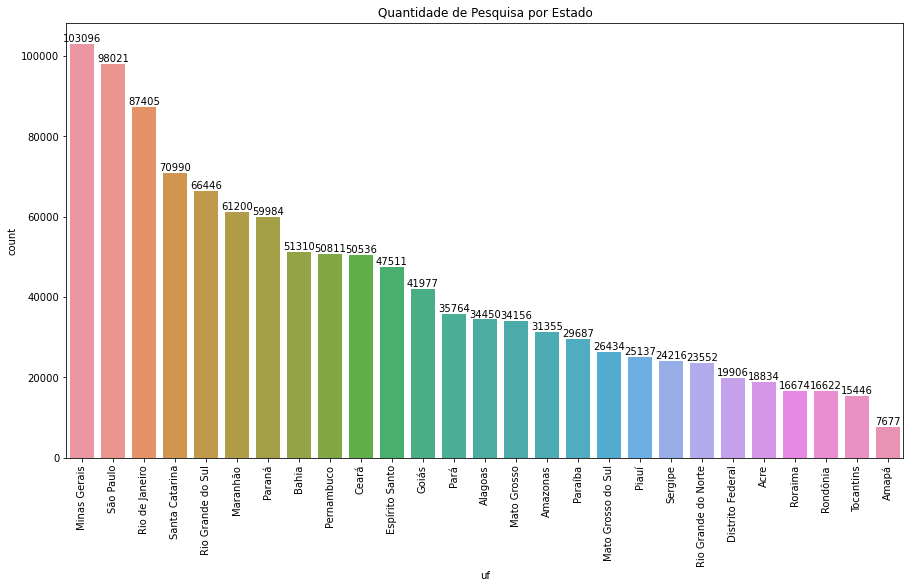

In [118]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(df_trabalho['uf'], order = df_trabalho['uf'].value_counts(ascending=False).index)

abs_values = df_trabalho['uf'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)
plt.title('Quantidade de Pesquisa por Estado')

plt.show()

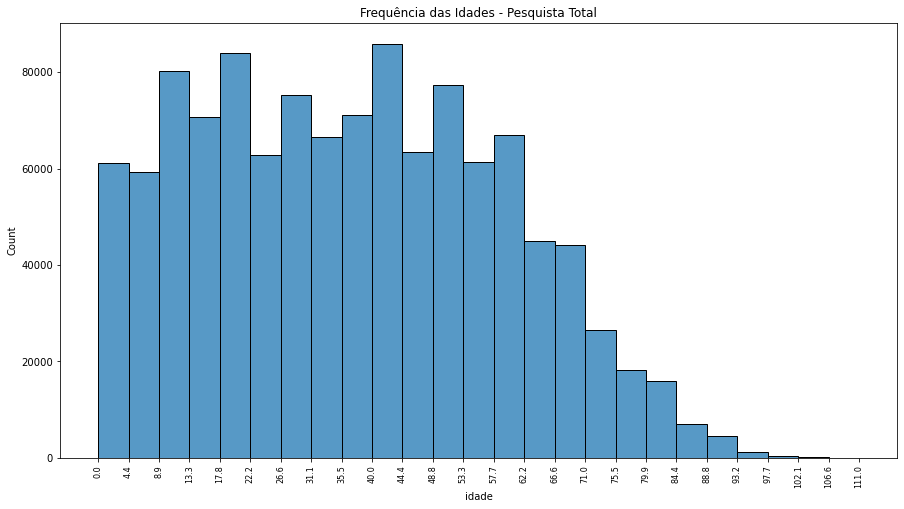

In [110]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data=df_trabalho, x='idade', bins = 25)
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Frequência das Idades - Pesquista Total')
plt.show()

In [206]:
df_trabalho['idade'].mean() #média idade pesquisa total

36.97701264448132

In [113]:
df_trabalho['sexo'].value_counts(normalize=True).round(4)*100 #proporção sexo pesquisa total

Mulher    52.08
Homem     47.92
Name: sexo, dtype: float64

In [115]:
df_trabalho['cor_raca'].value_counts(normalize=True).round(4)*100 #proporção cor ou raca pesquisa total

Parda       49.02
Branca      41.76
Preta        8.22
Amarela      0.59
Indígena     0.39
Ignorado     0.02
Name: cor_raca, dtype: float64

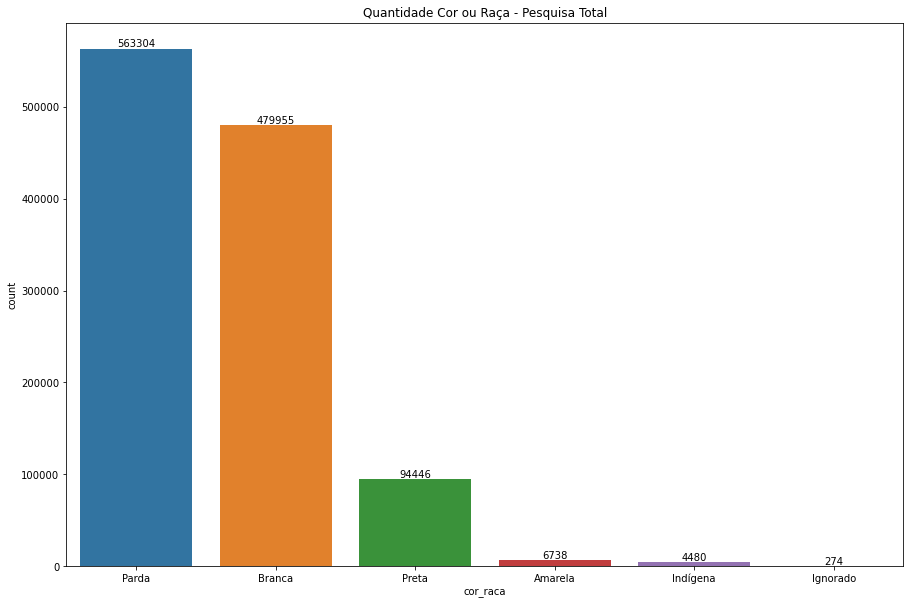

In [114]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(df_trabalho['cor_raca'], order = df_trabalho['cor_raca'].value_counts(ascending=False).index)


abs_values = df_trabalho['cor_raca'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.title('Quantidade Cor ou Raça - Pesquisa Total')



plt.show()

In [134]:
df_trabalho['resultado_teste'].value_counts(normalize=True).round(4)*100 #proporção do resultado do teste - pesquisa total

Não Fez                          95.57
Negativo                          3.04
Positivo                          1.26
Ainda não recebeu o resultado     0.11
Inconclusivo                      0.02
Ignorado                          0.00
Name: resultado_teste, dtype: float64

In [26]:
df_trabalho['resultado_teste'].fillna("Não Fez", inplace=True) #assumindo valores nulos como Não fez o teste

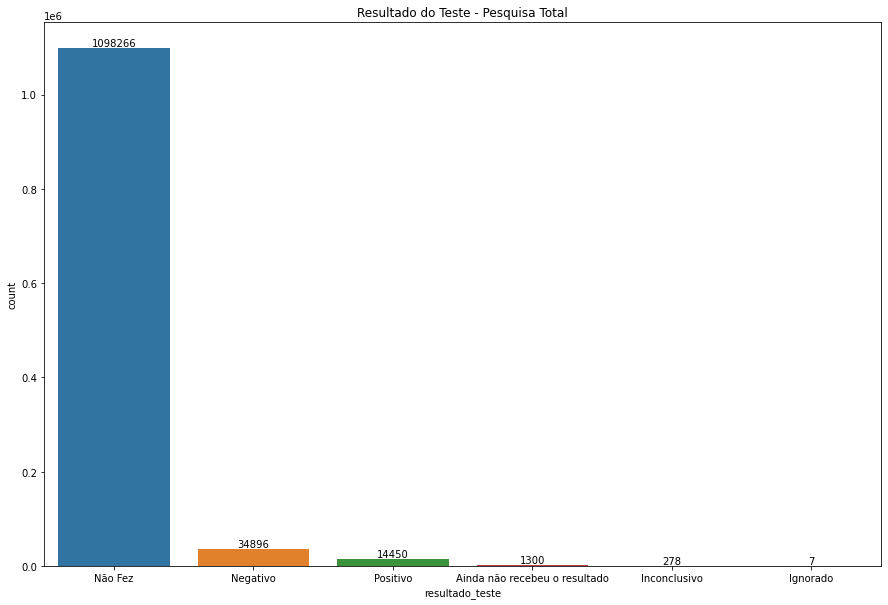

In [132]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(df_trabalho["resultado_teste"], order = df_trabalho["resultado_teste"].value_counts(ascending=False).index)


abs_values = df_trabalho["resultado_teste"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.title('Resultado do Teste - Pesquisa Total')



plt.show()

In [116]:
df_positivos = df_trabalho[df_trabalho["resultado_teste"] == "Positivo"]

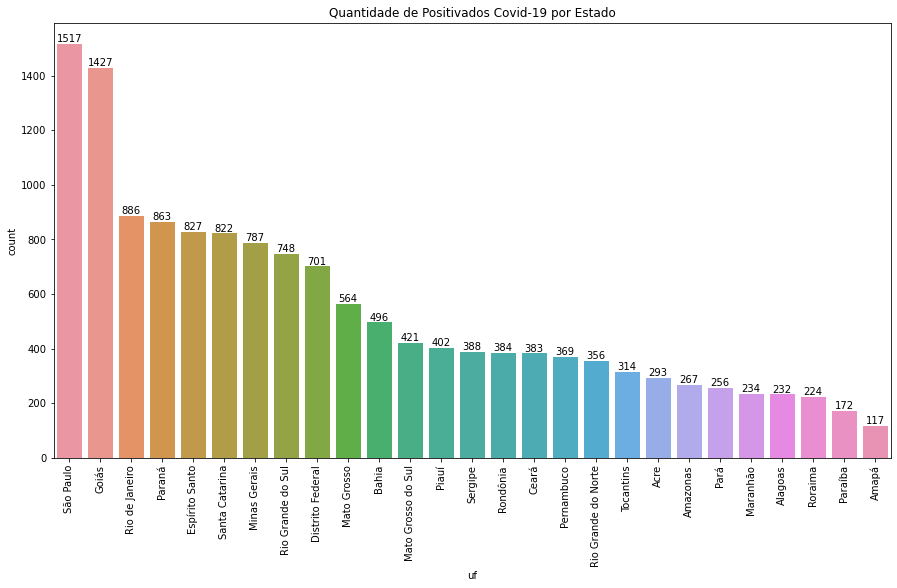

In [119]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(df_positivos['uf'], order = df_positivos['uf'].value_counts(ascending=False).index)

abs_values = df_positivos['uf'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)
plt.title('Quantidade de Positivados Covid-19 por Estado')

plt.show()

In [127]:
positivos_estados = df_positivos.groupby('uf')['uf'].count().reset_index(name='qtd')

In [123]:
pop_estados = pd.read_excel('ibge_estados_2022.xlsx')

In [125]:
pop_estados.rename(columns={"Unidade da Federação": "uf", "População": "pop"},inplace=True)

In [130]:
positivos_estados = positivos_estados.merge(pop_estados, on='uf', how='left')

In [138]:
positivos_estados['positivos_100mil_hab'] = ((positivos_estados['qtd']/positivos_estados['pop'])*100_000).round(2)

In [139]:
positivos_estados

,uf,qtd,pop,positivos_100mil_hab
0,Acre,293,830018,35.30
1,Alagoas,232,3127683,7.42
2,Amapá,117,733759,15.95
3,Amazonas,267,3941613,6.77
4,Bahia,496,14141626,3.51
5,Ceará,383,8794957,4.35
6,Distrito Federal,701,2817381,24.88
7,Espírito Santo,827,3833712,21.57
8,Goiás,1427,7056495,20.22
9,Maranhão,234,6775805,3.45


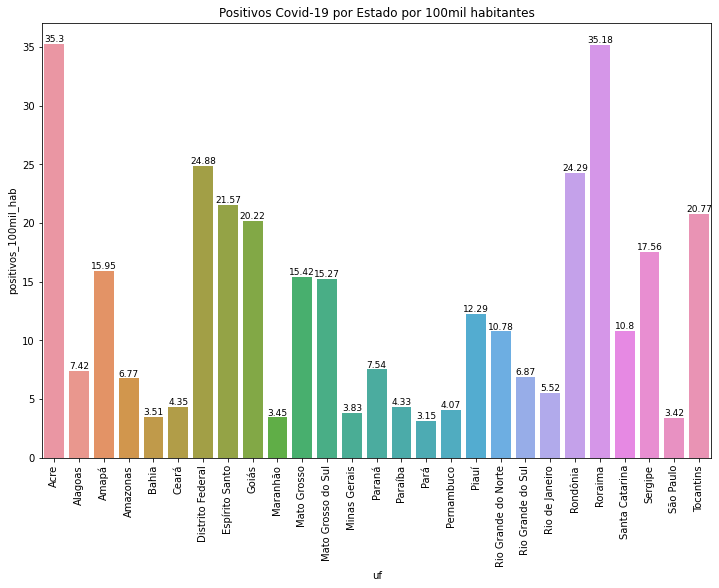

In [180]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=positivos_estados, x='uf', y='positivos_100mil_hab')

ax.bar_label(ax.containers[0], fontsize=9)
plt.xticks(rotation=90)
plt.title('Positivos Covid-19 por Estado por 100mil habitantes')
plt.show()

In [186]:
df_positivos['sexo'].value_counts(normalize=True).round(4)*100 #proporção sexo positivo covid-19

Mulher    54.19
Homem     45.81
Name: sexo, dtype: float64

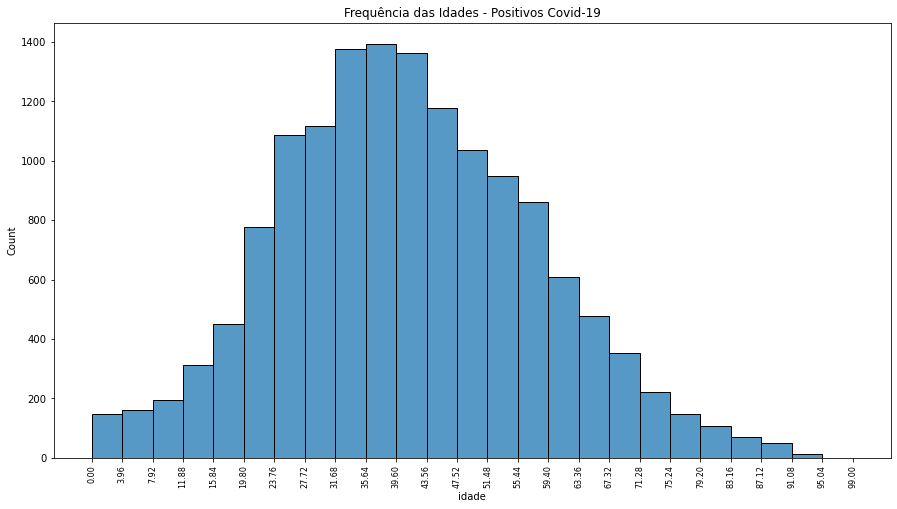

In [179]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data=df_positivos, x='idade', bins = 25)
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Frequência das Idades - Positivos Covid-19')
plt.show()

In [208]:
df_positivos['idade'].mean() #média idade positivos

41.068304498269896

In [184]:
df_positivos['cor_raca'].value_counts(normalize=True).round(4)*100 #proporção cor ou raca positivos covid19

Branca      47.09
Parda       44.12
Preta        7.97
Indígena     0.38
Amarela      0.37
Ignorado     0.07
Name: cor_raca, dtype: float64

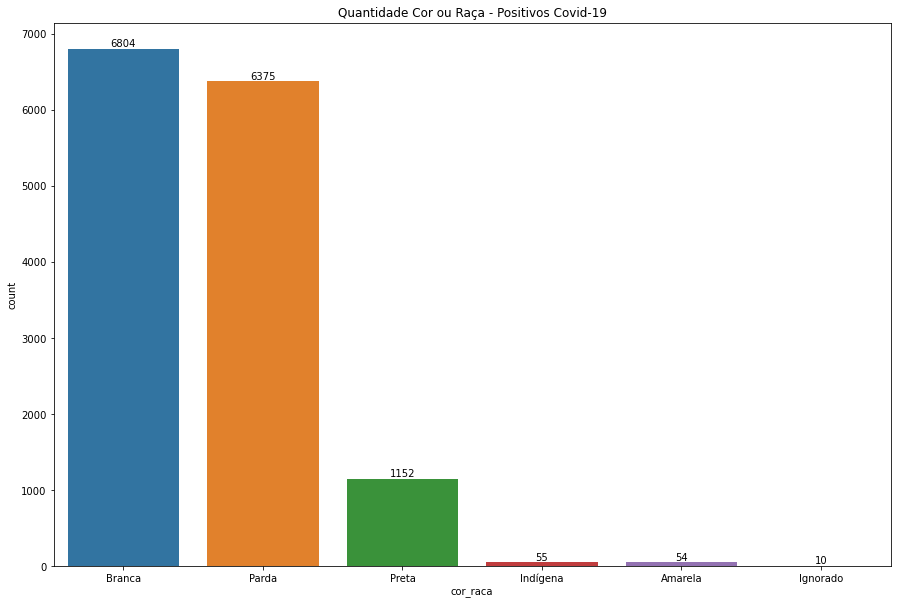

In [183]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(df_positivos['cor_raca'], order = df_positivos['cor_raca'].value_counts(ascending=False).index)


abs_values = df_positivos['cor_raca'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.title('Quantidade Cor ou Raça - Positivos Covid-19')



plt.show()

## Parte 3 - Características clínicas dos sintomas

In [196]:
def gravidade_caso(row):
    gravidade = ''
    if row['sin_febre'] == "Sim" or row['sin_tosse'] == "Sim" or row['sin_dor_garganta'] == "Sim" or row['sin_dor_cabeca'] == "Sim" or row['sin_nausea'] == "Sim" or row['sin_nariz_entup'] == "Sim"or row['sin_fadiga'] == "Sim" or row['sin_perda_olf'] == "Sim" or row['sin_dor_muscular'] == "Sim":
        gravidade = 'Leve'
        
    if row['sin_dific_respirar'] == "Sim" or row['si_dor_peito'] == "Sim":
        gravidade = 'Grave'

    if gravidade == '':
        gravidade = 'Assintomático'
    return gravidade

In [188]:
df_positivos['gravidade'] = df_positivos.apply(lambda row: gravidade_caso(row), axis=1)

In [222]:
df_positivos['gravidade'].value_counts(normalize=True).round(4)*100 #proporção por gravidade do sintoma - positivados

Assintomático    85.66
Leve              9.29
Grave             5.05
Name: gravidade, dtype: float64

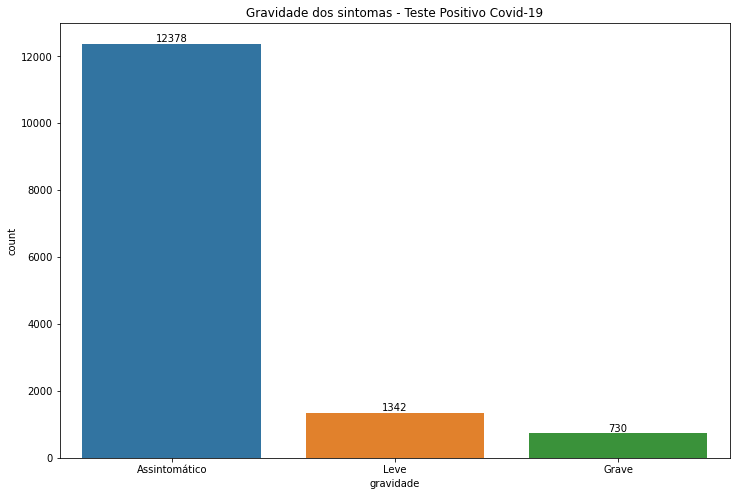

In [190]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df_positivos['gravidade'], order = df_positivos['gravidade'].value_counts(ascending=False).index)


abs_values = df_positivos['gravidade'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Gravidade dos sintomas - Teste Positivo Covid-19')


plt.show()

In [191]:
df_negativos = df_trabalho[df_trabalho["resultado_teste"] == "Negativo"]

In [223]:
df_negativos['gravidade'].value_counts(normalize=True).round(4)*100 #proporção por gravidade do sintoma - negativados

Assintomático    92.47
Leve              5.92
Grave             1.61
Name: gravidade, dtype: float64

In [197]:
df_negativos['gravidade'] = df_negativos.apply(lambda row: gravidade_caso(row), axis=1)

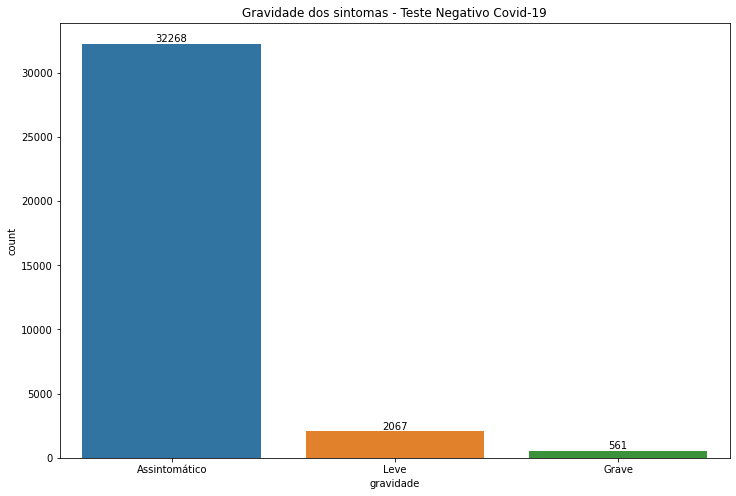

In [199]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df_negativos['gravidade'], order = df_negativos['gravidade'].value_counts(ascending=False).index)


abs_values = df_negativos['gravidade'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Gravidade dos sintomas - Teste Negativo Covid-19')


plt.show()

In [200]:
df_positivos_grave = df_positivos[df_positivos["gravidade"] == "Grave"]

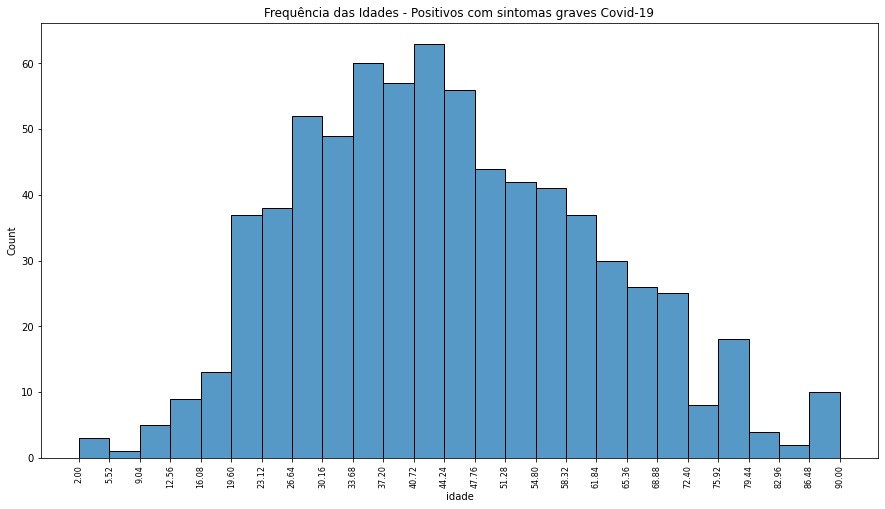

In [202]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(data=df_positivos_grave, x='idade', bins = 25)
edges = [rect.get_x() for rect in ax.patches] + [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.title('Frequência das Idades - Positivos com sintomas graves Covid-19')
plt.show()

In [215]:
df_positivos_grave['idade'].mean() #média idade teste positivo com sintomas graves

44.556164383561644

In [216]:
df_assintomaticos_positivados = df_positivos[df_positivos["gravidade"] == "Assintomático"]

In [217]:
df_assintomaticos_positivados['fez_isolamento'].value_counts()

Moderado      7076
Sim           3495
Totalmente     942
Não            833
Ignorado        32
Name: fez_isolamento, dtype: int64

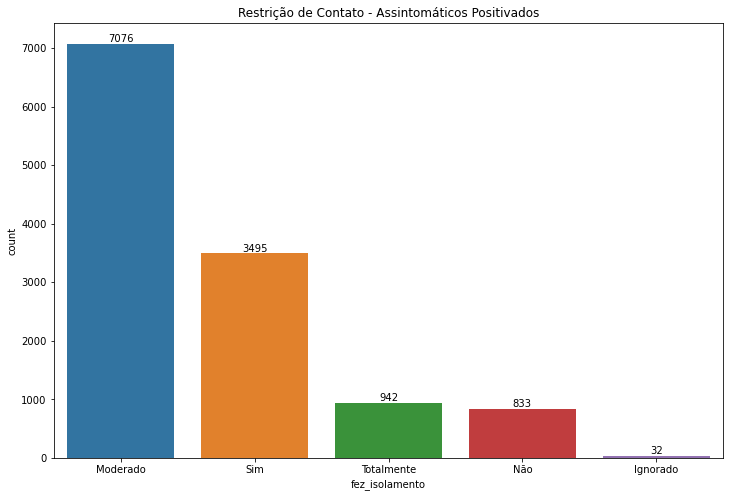

In [218]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(df_assintomaticos_positivados['fez_isolamento'], order = df_assintomaticos_positivados['fez_isolamento'].value_counts(ascending=False).index)


abs_values = df_assintomaticos_positivados['fez_isolamento'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Restrição de Contato - Assintomáticos Positivados')


plt.show()

In [224]:
df_grave_negativados = df_negativos[df_negativos["gravidade"] == "Grave"]

In [227]:
df_grave_negativados['procurou_unid_saude'].value_counts(normalize=True).round(4)*100 
#proporção dos que procuraram unidades de saúde mas testaram negativo e tinham sintomas graves

Sim    76.29
Não    23.71
Name: procurou_unid_saude, dtype: float64

## Parte 4 - Características econômicas da sociedade

In [229]:
df_positivos['faixa_rendimento'].value_counts()

801 - 1.600         3442
1.601 - 3.000       2554
3.001 - 10.000      1942
10.001 - 50.000      409
301 - 600            292
601 - 800            231
0 - 100              170
101 - 300             99
50.001 - 100.000       1
Name: faixa_rendimento, dtype: int64

In [230]:
df_positivos['faixa_rendimento'].value_counts(normalize=True).round(4)*100

801 - 1.600         37.66
1.601 - 3.000       27.94
3.001 - 10.000      21.25
10.001 - 50.000      4.47
301 - 600            3.19
601 - 800            2.53
0 - 100              1.86
101 - 300            1.08
50.001 - 100.000     0.01
Name: faixa_rendimento, dtype: float64

In [231]:
df_negativos['faixa_rendimento'].value_counts()

801 - 1.600         7929
1.601 - 3.000       5781
3.001 - 10.000      4801
10.001 - 50.000     1091
301 - 600            800
601 - 800            553
0 - 100              442
101 - 300            275
50.001 - 100.000       8
+100.000               1
Name: faixa_rendimento, dtype: int64

In [232]:
df_negativos['faixa_rendimento'].value_counts(normalize=True).round(4)*100

801 - 1.600         36.57
1.601 - 3.000       26.66
3.001 - 10.000      22.14
10.001 - 50.000      5.03
301 - 600            3.69
601 - 800            2.55
0 - 100              2.04
101 - 300            1.27
50.001 - 100.000     0.04
+100.000             0.00
Name: faixa_rendimento, dtype: float64

In [247]:
df_positivos['recebeu_aux'].value_counts(normalize=True).round(4)*100

Não    64.96
Sim    35.04
Name: recebeu_aux, dtype: float64

In [248]:
df_negativos['recebeu_aux'].value_counts(normalize=True).round(4)*100

Não    67.35
Sim    32.65
Name: recebeu_aux, dtype: float64

## Outros códigos

In [34]:
df_testados['resultado_teste'].value_counts(normalize=True).round(4)*100 #proporção do resultado dos testes

Negativo                         68.52
Positivo                         28.37
Ainda não recebeu o resultado     2.55
Inconclusivo                      0.55
Ignorado                          0.01
Name: resultado_teste, dtype: float64

In [35]:
df_positivos = df_trabalho[df_trabalho["resultado_teste"] == "Positivo"]

In [36]:
df_positivos.shape

(14450, 20)

In [37]:
df_positivos['sexo'].value_counts(normalize=True).round(4)*100 #positivados por sexo

Mulher    54.19
Homem     45.81
Name: sexo, dtype: float64

In [38]:
df_positivos['cor_raca'].value_counts(normalize=True).round(4)*100 #positivados por raca

Branca      47.09
Parda       44.12
Preta        7.97
Indígena     0.38
Amarela      0.37
Ignorado     0.07
Name: cor_raca, dtype: float64

In [39]:
df_positivos['uf'].value_counts(normalize=True).round(4)*100 #proporção por estado do total de positivados

São Paulo              10.50
Goiás                   9.88
Rio de Janeiro          6.13
Paraná                  5.97
Espírito Santo          5.72
Santa Catarina          5.69
Minas Gerais            5.45
Rio Grande do Sul       5.18
Distrito Federal        4.85
Mato Grosso             3.90
Bahia                   3.43
Mato Grosso do Sul      2.91
Piauí                   2.78
Sergipe                 2.69
Rondônia                2.66
Ceará                   2.65
Pernambuco              2.55
Rio Grande do Norte     2.46
Tocantins               2.17
Acre                    2.03
Amazonas                1.85
Pará                    1.77
Maranhão                1.62
Alagoas                 1.61
Roraima                 1.55
Paraíba                 1.19
Amapá                   0.81
Name: uf, dtype: float64

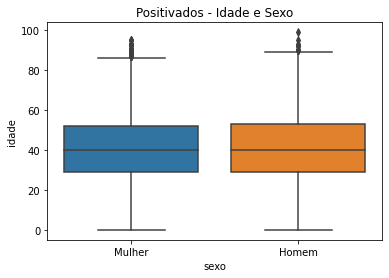

In [40]:
sns.boxplot(data=df_positivos,y='idade', x='sexo') #distribuição das idades por sexo
plt.title('Positivados - Idade e Sexo')
plt.show()

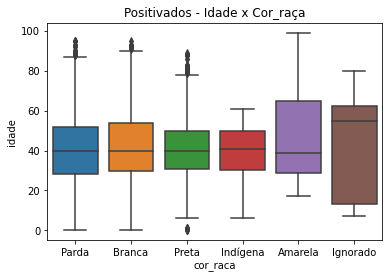

In [41]:
sns.boxplot(data=df_positivos,y='idade', x='cor_raca') #distribuição das idades por cor_raca
plt.title('Positivados - Idade x Cor_raça')
plt.show()

In [42]:
df_positivos.groupby('uf')['idade'].mean().sort_values(ascending=False).round(1) #média de idade por estado

uf
Alagoas                44.4
Pará                   44.4
Rio de Janeiro         43.7
Distrito Federal       42.8
Espírito Santo         42.4
São Paulo              42.3
Ceará                  42.2
Goiás                  41.6
Rio Grande do Norte    41.4
Paraíba                41.3
Rio Grande do Sul      41.2
Pernambuco             41.0
Paraná                 41.0
Bahia                  40.6
Amazonas               40.4
Piauí                  40.3
Sergipe                40.3
Minas Gerais           40.2
Santa Catarina         39.9
Rondônia               39.7
Maranhão               39.1
Mato Grosso do Sul     39.1
Mato Grosso            39.0
Amapá                  37.3
Tocantins              37.2
Roraima                36.9
Acre                   36.6
Name: idade, dtype: float64

In [43]:
df_sintomas = df_positivos[lista_colunas_sintomas]

In [44]:
df_sintomas

,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular
23,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
52,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
55,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
158,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
215,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Sim,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...
1149129,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1149130,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1149131,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
1149132,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [45]:
sintomas_sim_nao_dict = {
    "Sim": 1,
    "Não": 0
}



In [46]:
for coll in lista_colunas_sintomas:
  df_sintomas[coll] = df_sintomas[coll].map(sintomas_sim_nao_dict)

In [47]:
df_sintomas

,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1149129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_sintomas['total_sintomas'] = df_sintomas.sum(axis=1)

In [49]:
df_sintomas

,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,sin_nausea,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular,total_sintomas
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1149132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
conditions = [
    (df_sintomas['total_sintomas'] == 0),
    (df_sintomas['total_sintomas'] == 1),
    (df_sintomas['total_sintomas'] == 2),
    (df_sintomas['total_sintomas'] == 3),
    (df_sintomas['total_sintomas'] > 3)
    ]

values = ['assintomático', '1 sintoma', '2 sintomas', '3 sintomas', '4 ou mais sintomas']

df_sintomas['qtd_sintomas'] = np.select(conditions, values)

In [51]:
df_sintomas['qtd_sintomas'].value_counts()

assintomático         12378
4 ou mais sintomas     1079
1 sintoma               394
2 sintomas              329
3 sintomas              270
Name: qtd_sintomas, dtype: int64

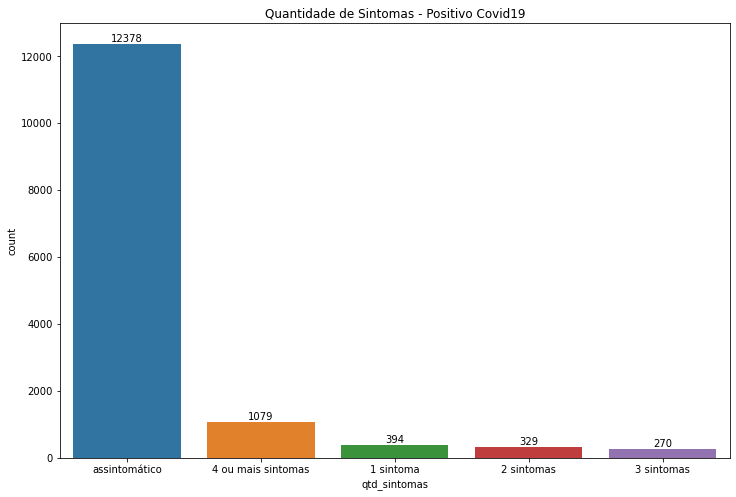

In [52]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(df_sintomas['qtd_sintomas'], order = df_sintomas['qtd_sintomas'].value_counts(ascending=False).index)


abs_values = df_sintomas['qtd_sintomas'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Quantidade de Sintomas - Positivo Covid19')


plt.show()

In [53]:
df_sintomas['qtd_sintomas'].value_counts(normalize=True).round(3)*100

assintomático         85.7
4 ou mais sintomas     7.5
1 sintoma              2.7
2 sintomas             2.3
3 sintomas             1.9
Name: qtd_sintomas, dtype: float64

In [54]:
def gravidade_caso(row):
    gravidade = ''
    if row['sin_febre'] == "Sim" or row['sin_tosse'] == "Sim" or row['sin_dor_garganta'] == "Sim" or row['sin_dor_cabeca'] == "Sim" or row['sin_nausea'] == "Sim" or row['sin_nariz_entup'] == "Sim"or row['sin_fadiga'] == "Sim" or row['sin_perda_olf'] == "Sim" or row['sin_dor_muscular'] == "Sim":
        gravidade = 'Leve'
        
    if row['sin_dific_respirar'] == "Sim" or row['si_dor_peito'] == "Sim":
        gravidade = 'Grave'

    if gravidade == '':
        gravidade = 'Assintomático'
    return gravidade

In [55]:
df_positivos['gravidade'] = df_positivos.apply(lambda row: gravidade_caso(row), axis=1)

In [56]:
df_positivos

,uf,idade,sexo,cor_raca,sin_febre,sin_tosse,sin_dor_garganta,sin_dific_respirar,sin_dor_cabeca,si_dor_peito,...,sin_nariz_entup,sin_fadiga,sin_perda_olf,sin_dor_muscular,resultado_teste,fez_isolamento,procurou_unid_saude,recebeu_aux,faixa_rendimento,gravidade
23,Rondônia,36,Mulher,Parda,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,NaN,Assintomático
52,Rondônia,28,Homem,Parda,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,1.601 - 3.000,Assintomático
55,Rondônia,38,Mulher,Parda,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,801 - 1.600,Assintomático
158,Rondônia,22,Homem,Parda,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,1.601 - 3.000,Assintomático
215,Rondônia,39,Mulher,Branca,Sim,Sim,Sim,Sim,Sim,Sim,...,Sim,Sim,Não,Sim,Positivo,Não,Não,Não,801 - 1.600,Grave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149129,Distrito Federal,33,Mulher,Branca,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,3.001 - 10.000,Assintomático
1149130,Distrito Federal,38,Homem,Branca,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Moderado,None,Não,10.001 - 50.000,Assintomático
1149131,Distrito Federal,6,Mulher,Branca,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Sim,None,Não,NaN,Assintomático
1149132,Distrito Federal,3,Mulher,Branca,Não,Não,Não,Não,Não,Não,...,Não,Não,Não,Não,Positivo,Sim,None,Não,NaN,Assintomático


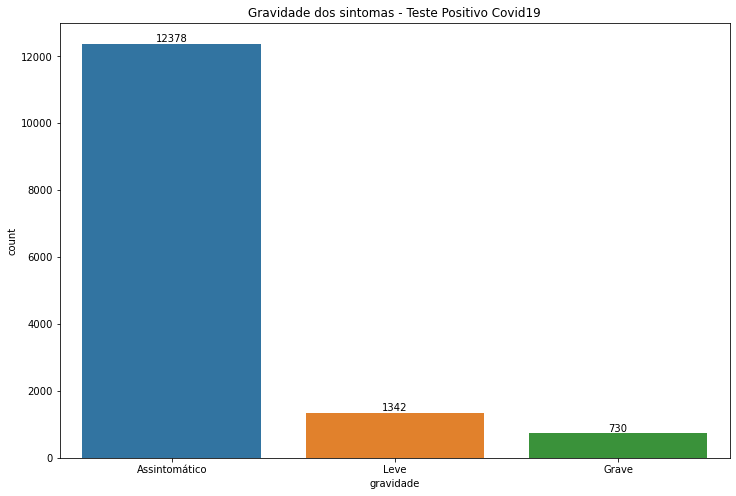

In [57]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(df_positivos['gravidade'], order = df_positivos['gravidade'].value_counts(ascending=False).index)


abs_values = df_positivos['gravidade'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Gravidade dos sintomas - Teste Positivo Covid19')


plt.show()

In [58]:
df_assintomatico = df_positivos[df_positivos['gravidade'] == "Assintomático"]

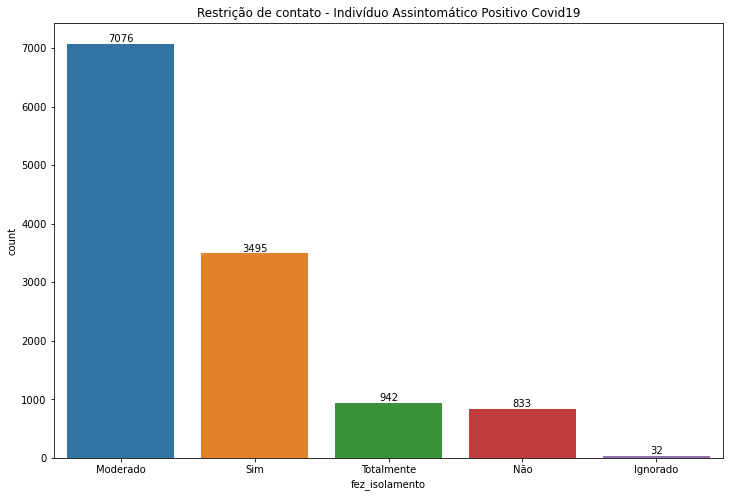

In [59]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(df_assintomatico['fez_isolamento'], order = df_assintomatico['fez_isolamento'].value_counts(ascending=False).index)


abs_values = df_assintomatico['fez_isolamento'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Restrição de contato - Indivíduo Assintomático Positivo Covid19')


plt.show()

In [60]:
df_negativos = df_trabalho[df_trabalho["resultado_teste"] == "Negativo"]

In [61]:
df_negativos['gravidade'] = df_negativos.apply(lambda row: gravidade_caso(row), axis=1)

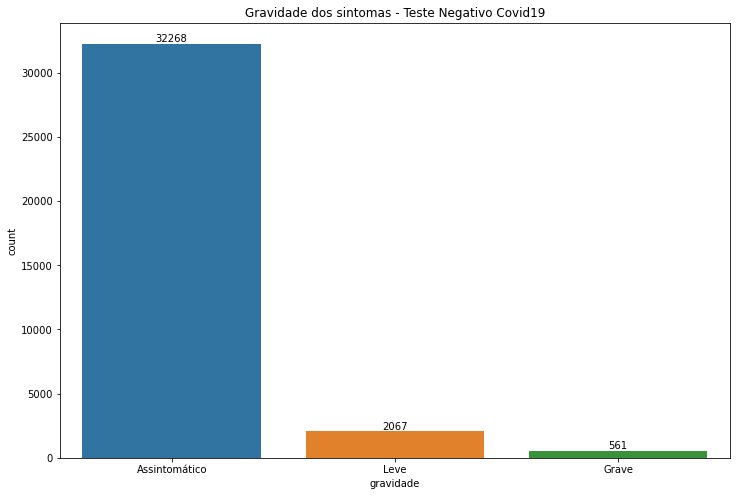

In [62]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df_negativos['gravidade'], order = df_negativos['gravidade'].value_counts(ascending=False).index)


abs_values = df_negativos['gravidade'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Gravidade dos sintomas - Teste Negativo Covid19')


plt.show()